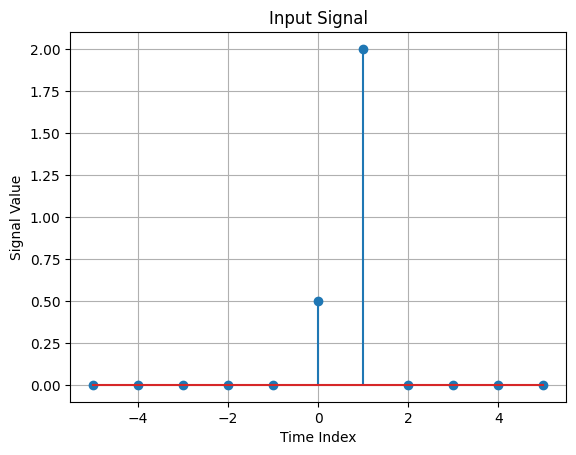

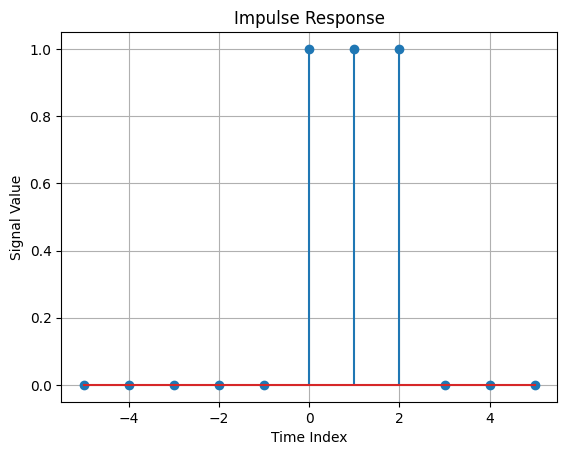

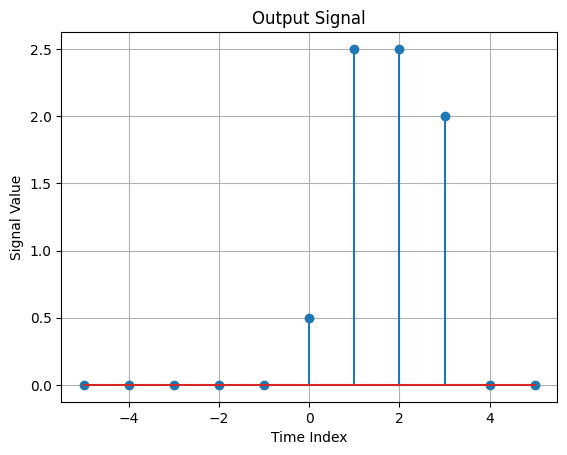

δ = 0.01


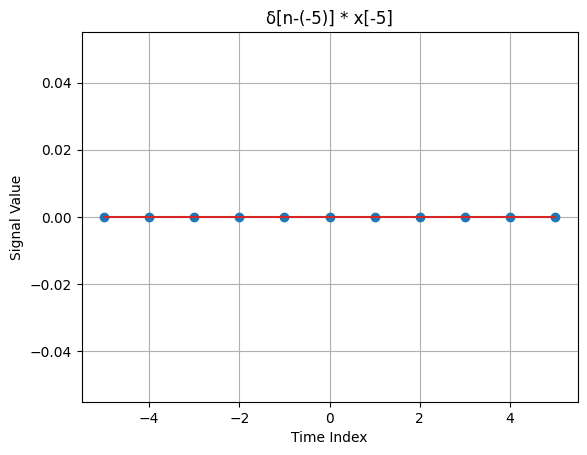

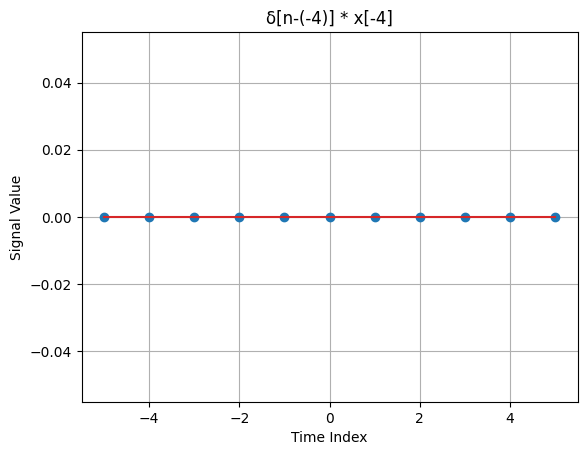

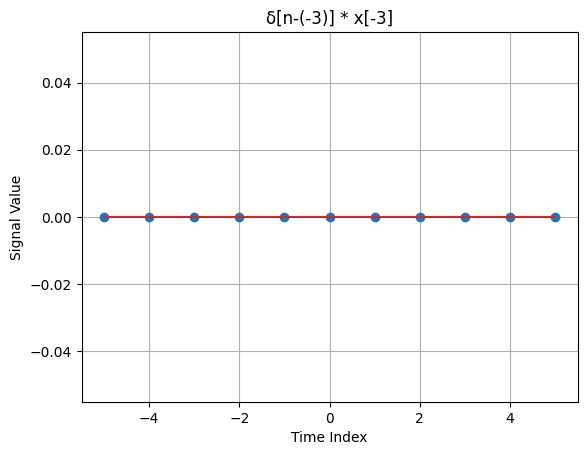

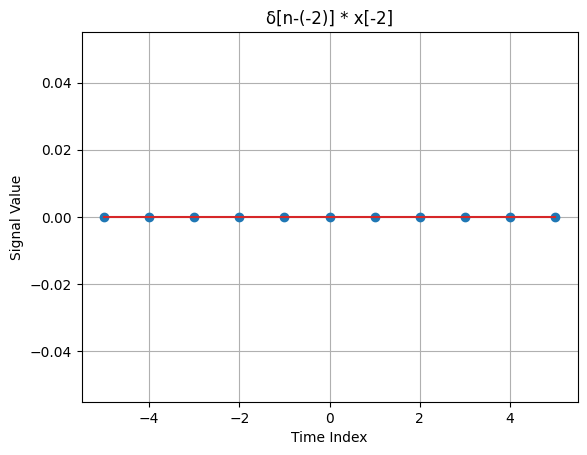

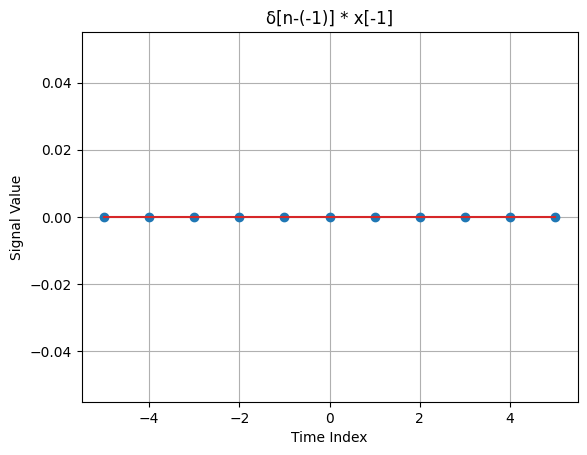

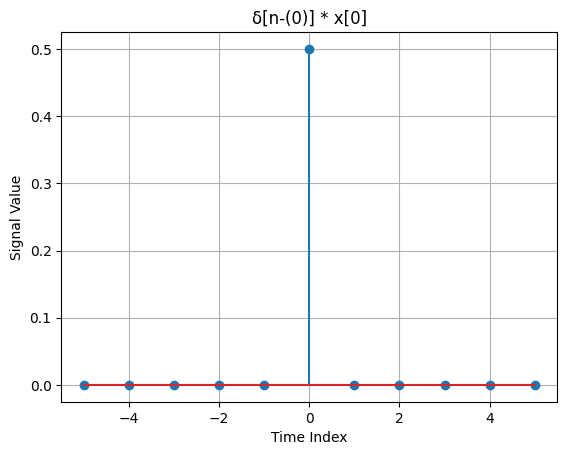

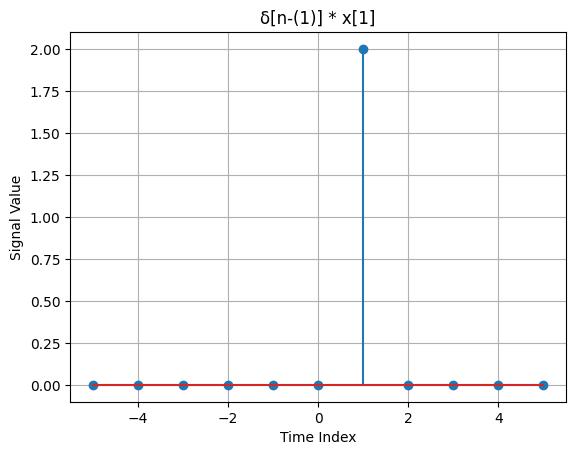

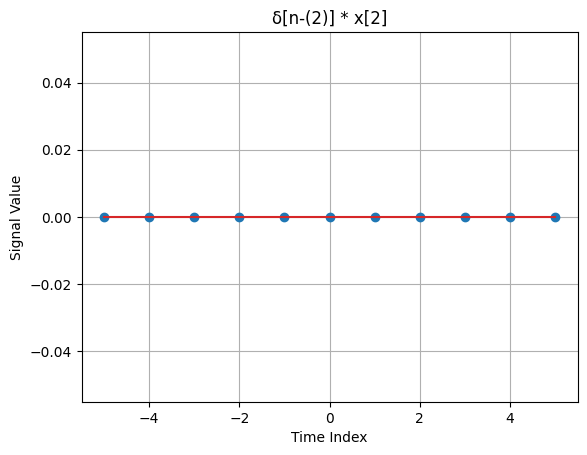

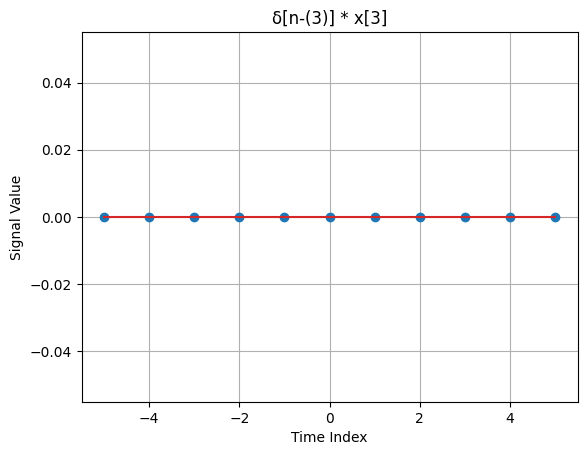

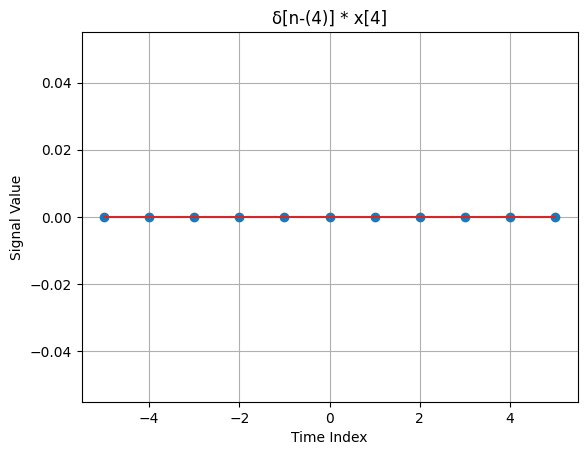

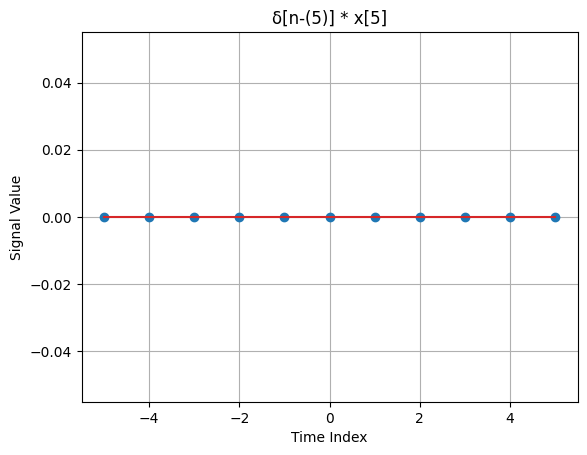

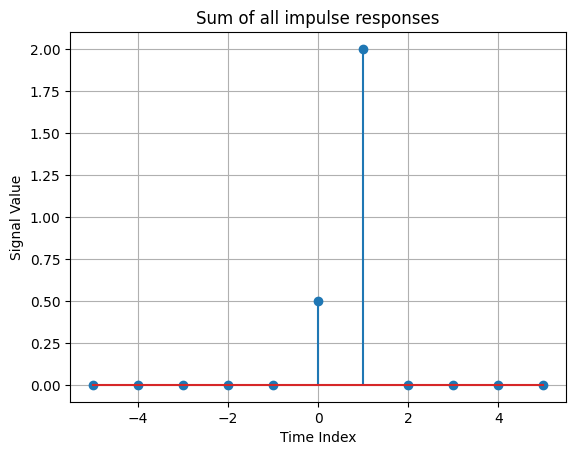

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteSignal:
    def __init__(self, INF):
        """
        Initialize a DiscreteSignal with a range (-INF, INF).
        """
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Values of the signal
        self.time_indices = np.arange(-INF, INF + 1)  # Time indices for the signal

    def set_value_at_time(self, time, value):
        """
        Sets the value of the signal at a specific time index.
        """
        if -self.INF <= time <= self.INF:
            self.values[time + self.INF] = value  # Shift time index for proper placement
        else:
            raise ValueError("Time index out of range")


    def multiply(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        multiplied_signal = DiscreteSignal(self.INF)
        multiplied_signal.values = self.values * other.values
        return multiplied_signal

    def add(self, other):
        if self.INF != other.INF:
            raise ValueError("Both signals must have the same INF value")
        added_signal = DiscreteSignal(self.INF)
        added_signal.values = self.values + other.values
        return added_signal

    def plot(self, title="Discrete Signal"):
        """
        Plot the signal.
        """
        plt.stem(self.time_indices, self.values)
        plt.title(title)
        plt.xlabel("Time Index")
        plt.ylabel("Signal Value")
        plt.grid()
        plt.show()


class LTI_Discrete:
    def __init__(self, impulse_response):
        """
        Initialize the LTI system with the given impulse response.
        :param impulse_response: An instance of DiscreteSignal representing the impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        """
        Decompose the input signal into a linear combination of unit impulses.
        :param input_signal: An instance of DiscreteSignal.
        :return: Impulses and their corresponding coefficients.
        """
        impulses = []
        coefficients = []
        for t in range(-input_signal.INF, input_signal.INF + 1):
            coeff = input_signal.values[t + input_signal.INF]
            if coeff != 0:
                impulses.append(t)
                coefficients.append(coeff)
        return impulses, coefficients

    def output(self, input_signal):
        """
        Compute the output of the system by convolving the input signal with the system's impulse response.
        :param input_signal: An instance of DiscreteSignal.
        :return: Output signal as a DiscreteSignal instance.
        """
        INF = input_signal.INF
        output_signal = DiscreteSignal(INF)

        for n in range(-INF, INF + 1):
            value = 0
            for k in range(-INF, INF + 1):
                if -INF <= n - k <= INF:
                    value += input_signal.values[k + INF] * self.impulse_response.values[(n - k) + INF]
            output_signal.set_value_at_time(n, value)
        return output_signal


# Example Usage:
if __name__ == "__main__":
    INF = 5  # Define the range of the signal

    # Define an impulse response for the LTI system
    impulse_response = DiscreteSignal(INF)
    impulse_response.set_value_at_time(0, 1)  # Unit impulse
    impulse_response.set_value_at_time(1, 1)
    impulse_response.set_value_at_time(2, 1)

    # Define an input signal
    input_signal = DiscreteSignal(INF)
    input_signal.set_value_at_time(0, 0.5)
    input_signal.set_value_at_time(1, 2)
    # input_signal.set_value_at_time(2, 3)

    # Create an LTI system
    lti_system = LTI_Discrete(impulse_response)

    # Find the output
    output_signal = lti_system.output(input_signal)

    # Plot input, impulse response, and output
    input_signal.plot("Input Signal")
    impulse_response.plot("Impulse Response")
    output_signal.plot("Output Signal")


    # fig, axes = plt.subplots(4, 3, figsize=(12, 8))  # 4 rows, 3 columns

    # for i in range(4):
    #  for j in range(3):
    #     # Generate some example data
    #     x = np.linspace(0, 10, 100)
    #     y = np.sin(x + (i * 3 + j))  # Modify data slightly for each subplot
        
    #     # Plot on the corresponding axes
    #     axes[i, j].plot(x, y)
    #     axes[i, j].set_title(f'Figure {i * 3 + j + 1}')
    # plt.subplots_adjust(hspace=0.5)  # Adjust the space between the subplots
    delta_symbol = "δ"
    # print(f"{delta_symbol} = 0.01")
    sum_signal = DiscreteSignal(INF)

    for i in range(2*INF+1):
        unit_impulse = DiscreteSignal(INF) 
        unit_impulse.set_value_at_time(-INF+i, 1)
        impulse_mult = input_signal.multiply(unit_impulse)
        sum_signal = sum_signal.add(impulse_mult)
        impulse_mult.plot(f"{delta_symbol}[n-({-INF+i})] * x[{-INF+i}]")
    sum_signal.plot("Sum of all impulse responses")

    output_signal
    
        

